<a href="https://colab.research.google.com/github/TusharV-13/Scoial-Network-analysis-of-facebook-pages/blob/main/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install.packages("gridExtra")
# install.packages("igraph")
# install.packages("ggplot2")
# install.packages("codetools")
library(codetools)
library(gridExtra)
library(igraph)
library(ggplot2)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
# Reading in the graph, and viewing its brief summary
pl_graph <- read.graph(file = "https://raw.githubusercontent.com/TusharV-13/Scoial-Network-analysis-of-facebook-pages/main/dataset.txt", format = "gml")
summary(pl_graph)

IGRAPH fa0a2d6 D--- 582 2810 -- 
+ attr: id (v/n), label (v/c), graphics (v/c), fan_count (v/c),
| category (v/c), username (v/c), users_can_post (v/c), link (v/c),
| post_activity (v/c), talking_about_count (v/c), Yala (v/c), id (e/n),
| value (e/n)


In [3]:
# Inspecting the page graph object
pl_df <- data.frame(id = V(pl_graph)$id,
                    name = V(pl_graph)$label,
                    category = V(pl_graph)$category,
                    fans = as.numeric(V(pl_graph)$fan_count),
                    talking_about = as.numeric(V(pl_graph)$talking_about_count),
                    post_activity = as.numeric(V(pl_graph)$post_activity),
                    stringsAsFactors = FALSE
                    )
View(pl_df)

id,name,category,fans,talking_about,post_activity
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
10,Premier League,Sports League,39301910,634081,0.31
20,TAG Heuer,Jewelry/Watches,2823063,30796,0.14
30,Carling,Food & Beverage Company,200508,12078,0.03
40,Hull Tigers,Sports Team,1000560,40500,0.23
50,Middlesbrough FC,Sports Team,431967,25042,0.29
60,Burnley Football Club,Sports Team,352042,3279,0.19
70,Watford FC,Sports Team,362231,11308,0.11
80,AFC Bournemouth,Sports Team,326942,12651,0.54
90,Leicester City Football Club,Sports Team,6554721,218176,0.51


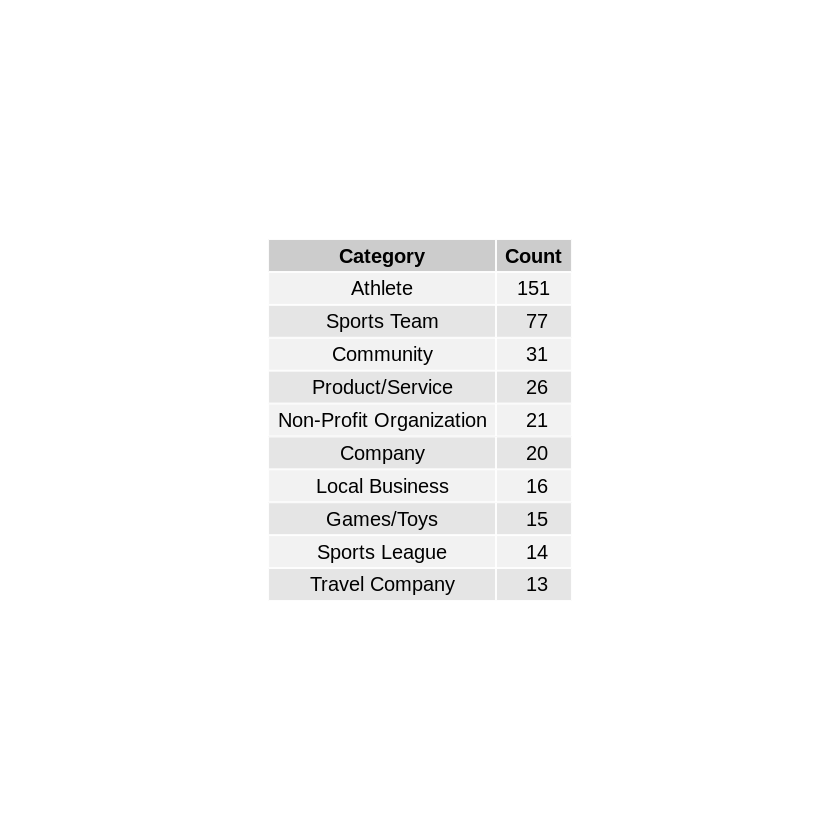

In [4]:
# Aggregating pages based on their category
grid.table(as.data.frame(sort(table(pl_df$category), decreasing = TRUE)[1:10]), 
           rows = NULL,
           cols = c('Category', 'Count'))

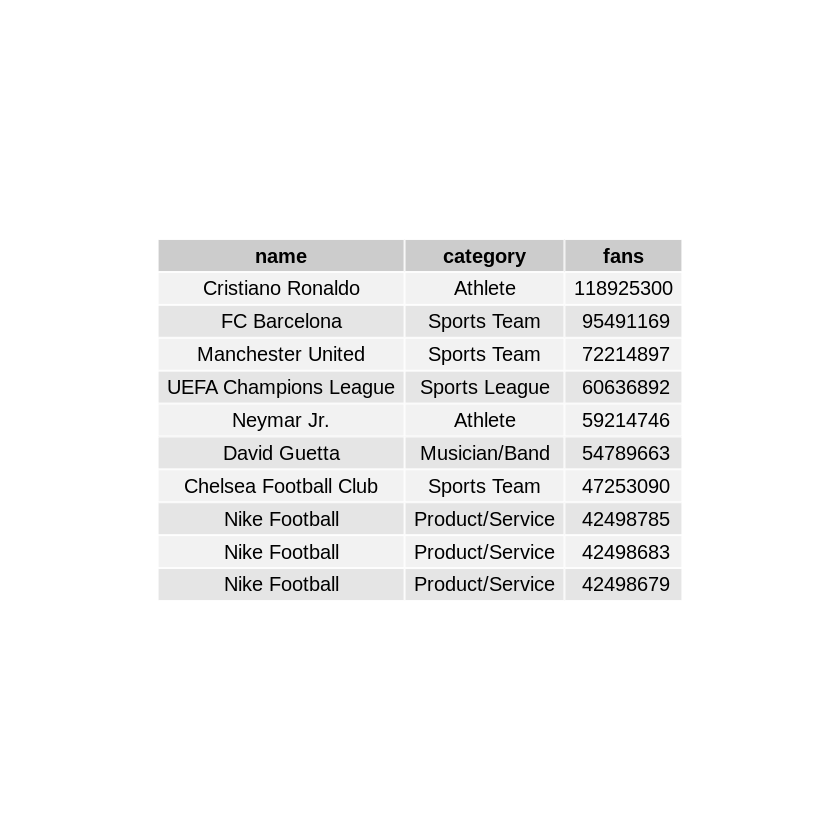

In [5]:
# Top pages based on their fan count (likes)

grid.table(pl_df[order(pl_df$fans, decreasing = TRUE),
                 c('name', 'category', 'fans')][1:10, ],
           rows = NULL)

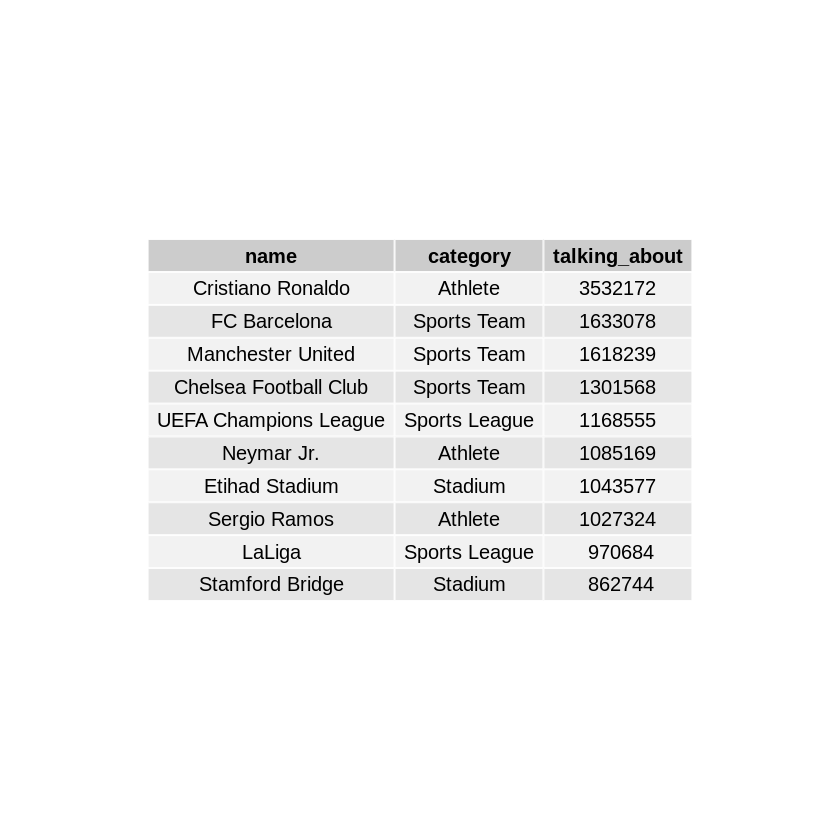

In [6]:
# Top pages based on total people talking about them

grid.table(pl_df[order(pl_df$talking_about, decreasing = TRUE),
                 c('name', 'category', 'talking_about')][1:10, ], 
           rows = NULL)

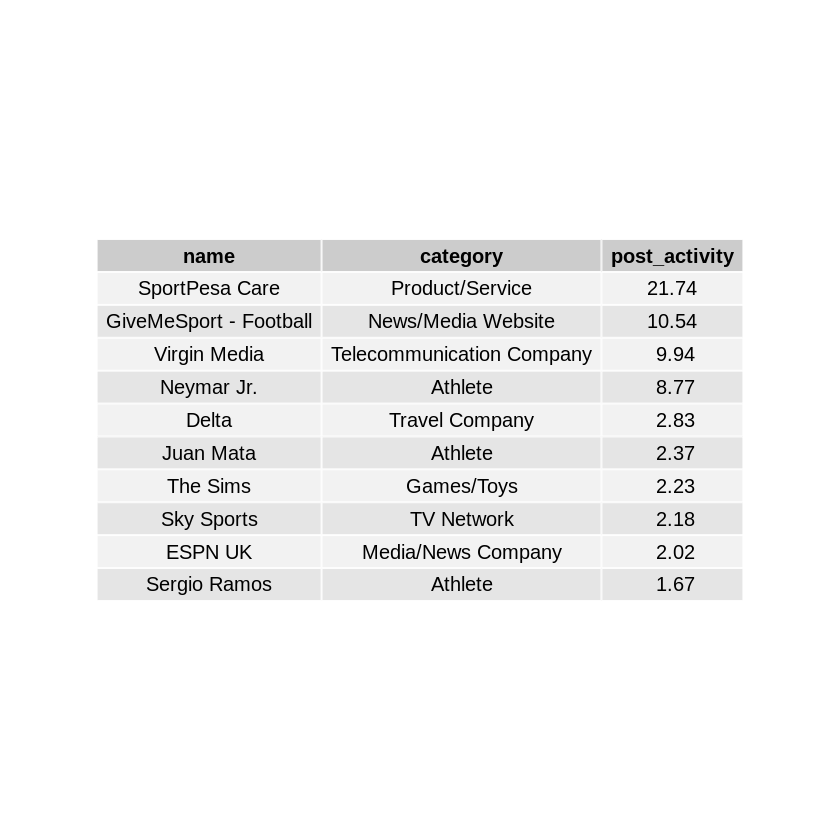

In [7]:
grid.table(pl_df[order(pl_df$post_activity, decreasing = TRUE),
                 c('name', 'category', 'post_activity')][1:10, ],
           rows = NULL)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 24 rows containing missing values (geom_point).”


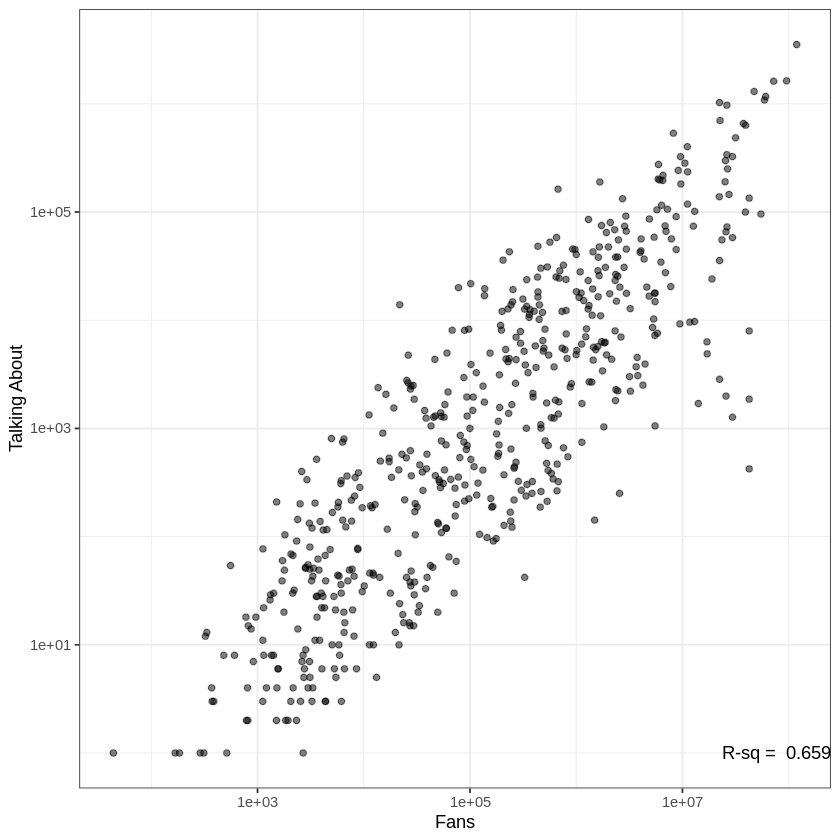

In [8]:
# Checking correlation between fans and talking about for pages
clean_pl_df <- pl_df[complete.cases(pl_df), ]
rsq <- format(cor(clean_pl_df$fans, clean_pl_df$talking_about) ^ 2, digits = 3)
corr_plot <- ggplot(pl_df, aes(x = fans, y = talking_about)) + theme_bw() +
  geom_jitter(alpha = 1/2) +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "Fans", y = "Talking About") +
  annotate("text", label = paste("R-sq = ", rsq), x = +Inf, y = 1, hjust = 1)
corr_plot

In [9]:
# Diameter (length of longest path) of the network
diameter(pl_graph, directed = TRUE)

[1] 7

In [10]:
# Getting the longest path of the network
get_diameter(pl_graph, directed = TRUE)$label

[1] "Sports Arena Hull"    "Hull Tigers"          "Teenage Cancer Trust"
[4] "Celtic FC"            "Dafabet UK"           "Premier League"      
[7] "Carling"              "Alice Gold"

In [11]:
# Mean distance between 2 nodes in the network
mean_distance(pl_graph, directed = TRUE)

[1] 3.696029

,Premier League,Manchester United,Manchester City,Liverpool FC,Arsenal,Chelsea Football Club
Premier League,0,1,1,1,1,1
Manchester United,1,0,2,2,2,2
Manchester City,1,2,0,2,2,2
Liverpool FC,1,2,2,0,2,2
Arsenal,1,2,2,2,0,2
Chelsea Football Club,1,2,2,2,2,0


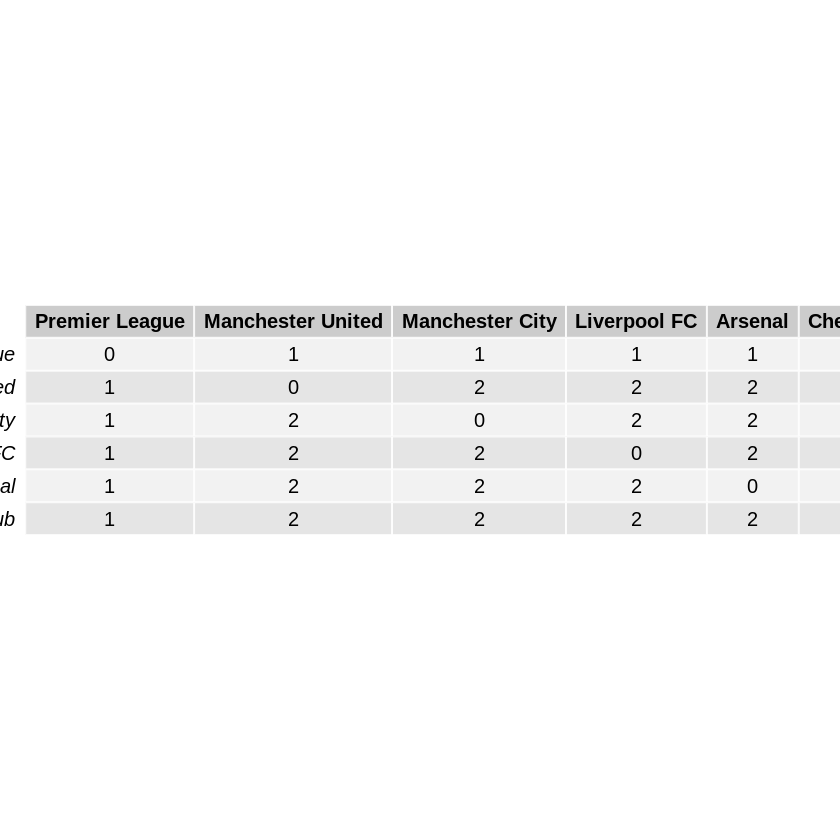

In [12]:
# Distance between various important pages (nodes)
node_dists <- distances(pl_graph, weights = NA)
labels <- c("Premier League", pl_df[c(21, 22, 23, 24, 25), 'name'])
filtered_dists <- node_dists[c(1, 21, 22, 23, 24, 25), c(1, 21, 22, 23, 24, 25)]
colnames(filtered_dists) <- labels
rownames(filtered_dists) <- labels
grid.table(filtered_dists)
View(filtered_dists)

In [13]:
edge_density(pl_graph)

[1] 0.008310118

In [14]:
# no. of edges / no. of all possible edges
2801 / (582 * 581)

[1] 0.008283502

In [15]:
transitivity(pl_graph)

[1] 0.163949

In [16]:
# transitivity clustering coefficient
page_names <- V(pl_graph)$label
page_coreness <- coreness(pl_graph)
page_coreness_df = data.frame(Page = page_names,
                              PageCoreness = page_coreness)
page_coreness_df


Page,PageCoreness
<chr>,<dbl>
Premier League,11
TAG Heuer,6
Carling,5
Hull Tigers,9
Middlesbrough FC,7
Burnley Football Club,11
Watford FC,9
AFC Bournemouth,9
Leicester City Football Club,10


In [17]:
# Max coreness
max(page_coreness_df$PageCoreness)

[1] 11

In [18]:
View(head(page_coreness_df[
  page_coreness_df$PageCoreness == max(page_coreness_df$PageCoreness),], 20))
# Viewing the core of the network

,Page,PageCoreness
,<chr>,<dbl>
1,Premier League,11
6,Burnley Football Club,11
10,Crystal Palace Football Club,11
11,West Ham United,11
12,Southampton FC,11
14,Everton Football Club,11
15,Nike Football,11
16,West Bromwich Albion,11
17,Tottenham Hotspur,11


In [19]:
View(head(page_coreness_df[
  page_coreness_df$PageCoreness == min(page_coreness_df$PageCoreness),], 20))
# Viewing the periphery of the network

,Page,PageCoreness
,<chr>,<dbl>
34,Henrik Lundqvist,1
37,Cara Delevingne,1
38,La Carrera Panamericana,1
39,Patrick Dempsey,1
40,Dempsey Racing,1
52,The Carling Local at V Festival,1
57,Tigers Trust,1
59,Hull Tigers Commercial’,1
60,Hull Tigers Arabic,1


In [20]:
degree_plg <- degree(pl_graph, mode = "total")
degree_plg_df <- data.frame(Name = V(pl_graph)$label,
                            Degree = as.vector(degree_plg))
degree_plg_df <- degree_plg_df[order(degree_plg_df$Degree, decreasing = TRUE), ]
View(degree_plg_df)
# Degree

,Name,Degree
,<chr>,<dbl>
22,Manchester City,109
24,Arsenal,92
15,Nike Football,91
19,Sunderland AFC,91
25,Chelsea Football Club,90
1,Premier League,85
21,Manchester United,84
6,Burnley Football Club,82
14,Everton Football Club,65


In [21]:
closeness_plg <- closeness(pl_graph, mode = "all", normalized = TRUE)
closeness_plg_df <- data.frame(Name = V(pl_graph)$label,
                               Closeness = as.vector(closeness_plg))
closeness_plg_df <- closeness_plg_df[order(closeness_plg_df$Closeness, decreasing = TRUE), ]
View(closeness_plg_df)
# Closeness

,Name,Closeness
,<chr>,<dbl>
1,Premier League,0.5340074
19,Sunderland AFC,0.4874161
6,Burnley Football Club,0.4805624
26,Barclays Football,0.4723577
129,EFL Cup,0.4611111
366,606,0.4469231
243,EA SPORTS FIFA,0.4418251
150,The Offside Rule (We Get It!) Podcast,0.4411541
156,The H and C News Football Pie League,0.4365139


In [22]:
betweenness_plg <- betweenness(pl_graph)
betweenness_plg_df <- data.frame(Name = V(pl_graph)$label,
                                 Betweenness = as.vector(betweenness_plg))
betweenness_plg_df <- betweenness_plg_df[order(betweenness_plg_df$Betweenness, decreasing = TRUE), ]
View(betweenness_plg_df)
# Betweenness

,Name,Betweenness
,<chr>,<dbl>
1,Premier League,96082.154
22,Manchester City,32242.448
19,Sunderland AFC,24583.192
24,Arsenal,22258.680
6,Burnley Football Club,21872.563
15,Nike Football,21232.926
21,Manchester United,19781.410
243,EA SPORTS FIFA,19013.004
25,Chelsea Football Club,18181.458


In [23]:
View(head(degree_plg_df, 10))
View(head(closeness_plg_df, 10))
View(head(betweenness_plg_df, 10))
# Viewing top pages based on above measures

,Name,Degree
,<chr>,<dbl>
22,Manchester City,109
24,Arsenal,92
15,Nike Football,91
19,Sunderland AFC,91
25,Chelsea Football Club,90
1,Premier League,85
21,Manchester United,84
6,Burnley Football Club,82
14,Everton Football Club,65


,Name,Closeness
,<chr>,<dbl>
1,Premier League,0.5340074
19,Sunderland AFC,0.4874161
6,Burnley Football Club,0.4805624
26,Barclays Football,0.4723577
129,EFL Cup,0.4611111
366,606,0.4469231
243,EA SPORTS FIFA,0.4418251
150,The Offside Rule (We Get It!) Podcast,0.4411541
156,The H and C News Football Pie League,0.4365139


,Name,Betweenness
,<chr>,<dbl>
1,Premier League,96082.15
22,Manchester City,32242.45
19,Sunderland AFC,24583.19
24,Arsenal,22258.68
6,Burnley Football Club,21872.56
15,Nike Football,21232.93
21,Manchester United,19781.41
243,EA SPORTS FIFA,19013.00
25,Chelsea Football Club,18181.46


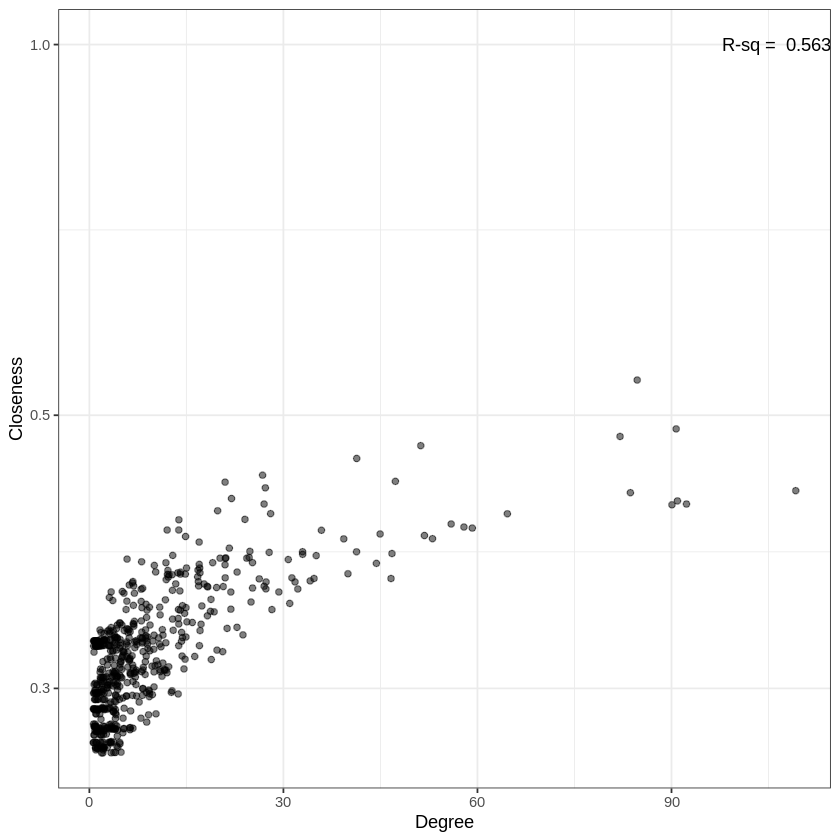

In [24]:
# Correlation plots
plg_df <- data.frame(degree_plg, closeness_plg, betweenness_plg)
# Graph 1 - degree vs closeness
rsq <- format(cor(degree_plg, closeness_plg) ^ 2, digits = 3)
corr_plot <- ggplot(plg_df, aes(x = degree_plg, y = closeness_plg)) + 
  theme_bw() +
  geom_jitter(alpha = 1/2) +
  scale_y_log10() +
  labs(x = "Degree", y = "Closeness") +
  annotate("text", label = paste("R-sq = ", rsq), x = +Inf, y = 1, hjust = 1)
corr_plot

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 243 rows containing missing values (geom_point).”


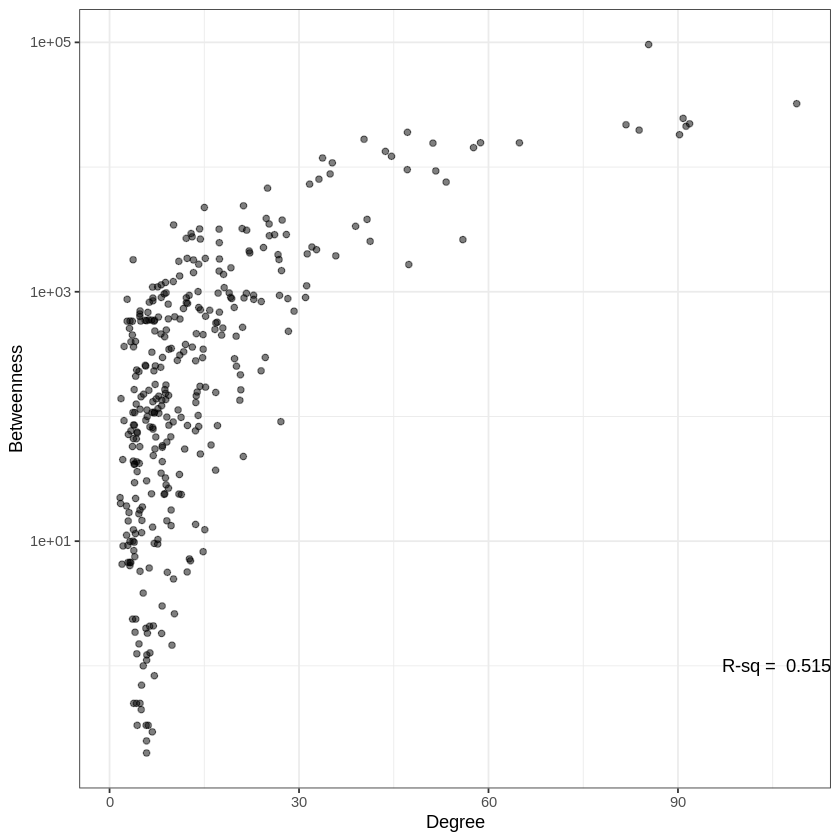

In [25]:
# Graph 2- degree vs betweenness
rsq <- format(cor(degree_plg, betweenness_plg) ^ 2, digits = 3)
corr_plot <- ggplot(plg_df, aes(x = degree_plg, y = betweenness_plg)) + 
  theme_bw() +
  geom_jitter(alpha = 1/2) +
  scale_y_log10() +
  labs(x = "Degree", y = "Betweenness") +
  annotate("text", label = paste("R-sq = ", rsq), x = +Inf, y = 1, hjust = 1)
corr_plot

In [26]:
evcentrality_plg <- eigen_centrality(pl_graph)$vector
evcentrality_plg_df <- data.frame(Name = V(pl_graph)$label,
                                  EVcentrality = as.vector(evcentrality_plg))
evcentrality_plg_df <- evcentrality_plg_df[order(evcentrality_plg_df$EVcentrality, decreasing = TRUE), ]
View(head(evcentrality_plg_df, 10))
# Eigenvector Centrality

,Name,EVcentrality
,<chr>,<dbl>
1,Premier League,1.0000000
21,Manchester United,0.9756104
22,Manchester City,0.9193786
24,Arsenal,0.7601505
262,Wayne Rooney,0.7497510
15,Nike Football,0.7217245
25,Chelsea Football Club,0.6871378
19,Sunderland AFC,0.6842139
445,UEFA Champions League,0.6432694


In [27]:
pagerank_plg <- page_rank(pl_graph)$vector
pagerank_plg_df <- data.frame(Name = V(pl_graph)$label, 
                              PageRank = as.vector(pagerank_plg))
pagerank_plg_df <- pagerank_plg_df[order(pagerank_plg_df$PageRank, decreasing = TRUE), ]
View(head(pagerank_plg_df, 10))
# PageRank

,Name,PageRank
,<chr>,<dbl>
15,Nike Football,0.027226678
24,Arsenal,0.019968333
21,Manchester United,0.018352130
25,Chelsea Football Club,0.017139476
22,Manchester City,0.013780236
558,adidas Football,0.013302024
245,PSG - Paris Saint-Germain,0.011784058
1,Premier League,0.011723774
445,UEFA Champions League,0.009690068


In [28]:
hits_plg <- authority_score(pl_graph)$vector
hits_plg_df <- data.frame(Name = V(pl_graph)$label,
                          AuthScore = as.vector(hits_plg))
hits_plg_df <- hits_plg_df[order(hits_plg_df$AuthScore, decreasing = TRUE), ]
View(head(hits_plg_df, 10))
# Kleinberg's HITS score

,Name,AuthScore
,<chr>,<dbl>
21,Manchester United,1.0000000
24,Arsenal,0.9619702
1,Premier League,0.9178324
22,Manchester City,0.8847690
25,Chelsea Football Club,0.8299846
14,Everton Football Club,0.6517946
17,Tottenham Hotspur,0.6220038
23,Liverpool FC,0.5799794
459,England football team,0.5277520


In [29]:
pl_neighbours <- neighbors(pl_graph, v = which(V(pl_graph)$label == "Southampton FC"))
pl_neighbours

+ 19/582 vertices, from fa0a2d6:
 [1]  26 126 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201

In [30]:
pl_neighbours$label

[1] "Barclays Football"                       
 [2] "The Emirates FA Cup"                     
 [3] "Jérémy Pied"                             
 [4] "Virgin Media"                            
 [5] "Under Armour (GB, IE)"                   
 [6] "Radhi Jaïdi"                             
 [7] "Oriol Romeu Vidal"                       
 [8] "NIX Communications Group"                
 [9] "José Fonte"                              
[10] "OctaFX"                                  
[11] "Florin Gardos"                           
[12] "Harrison Reed"                           
[13] "Ryan Bertrand"                           
[14] "Garmin"                                  
[15] "James Ward-Prowse"                       
[16] "Benali's Big Race"                       
[17] "Southampton Solent University - Official"
[18] "Sparsholt Football Academy"              
[19] "Saints Foundation"

In [31]:
# Example of finding neighbours of page vertices

In [32]:
## Get communities / clusters
# cliques use different sizes here and experiment
clique_num(pl_graph)

Warning message in clique_num(pl_graph):
“At core/cliques/maximal_cliques_template.h:269 : Edge directions are ignored for maximal clique calculation.”


[1] 10

In [33]:
count_max_cliques(pl_graph, min = 10, max = 10)

Warning message in count_max_cliques(pl_graph, min = 10, max = 10):
“At core/cliques/maximal_cliques_template.h:269 : Edge directions are ignored for maximal clique calculation.”


[1] 2

In [34]:
clique_list <- cliques(pl_graph, min = 10, max = 10)

Warning message in cliques(pl_graph, min = 10, max = 10):
“At core/cliques/cliquer_wrapper.c:57 : Edge directions are ignored for clique calculations.”


In [35]:
for (clique in clique_list) {
  print(clique$label)
  cat('\n\n')
}

 [1] "Manchester United"            "Wayne Rooney"                
 [3] "Juan Mata"                    "Bastian Schweinsteiger"      
 [5] "David De Gea"                 "Luke Shaw"                   
 [7] "Daley Blind"                  "Chevrolet FC"                
 [9] "Marouane Fellaini"            "Manchester United Foundation"


 [1] "Manchester United"            "Adnan Januzaj"               
 [3] "Wayne Rooney"                 "Juan Mata"                   
 [5] "Bastian Schweinsteiger"       "David De Gea"                
 [7] "Luke Shaw"                    "Daley Blind"                 
 [9] "Marouane Fellaini"            "Manchester United Foundation"




In [36]:
# filtering graph to get important nodes based on degree
degrees <- degree(pl_graph, mode = "total")
degrees_df <- data.frame(ID = V(pl_graph)$id,
                         Name = V(pl_graph)$label,
                         Degree = as.vector(degree_plg))
ids_to_remove <- degrees_df[degrees_df$Degree < 30, c('ID')]
ids_to_remove <- ids_to_remove / 10
filtered_pl_graph <- delete.vertices(pl_graph, ids_to_remove)
fplg_undirected <- as.undirected(filtered_pl_graph)

In [37]:
# Fast greedy clustering
fgc <- cluster_fast_greedy(fplg_undirected)
layout <- layout_with_fr(fplg_undirected,
                         niter = 500, 
                         start.temp = 5.744)
communities <- data.frame(layout)
names(communities) <- c("x", "y")
communities$cluster <- factor(fgc$membership)
communities$name <- V(fplg_undirected)$label

In [38]:
# get total pages in each cluster
table(communities$cluster)


 1  2  3 
15 10 10 

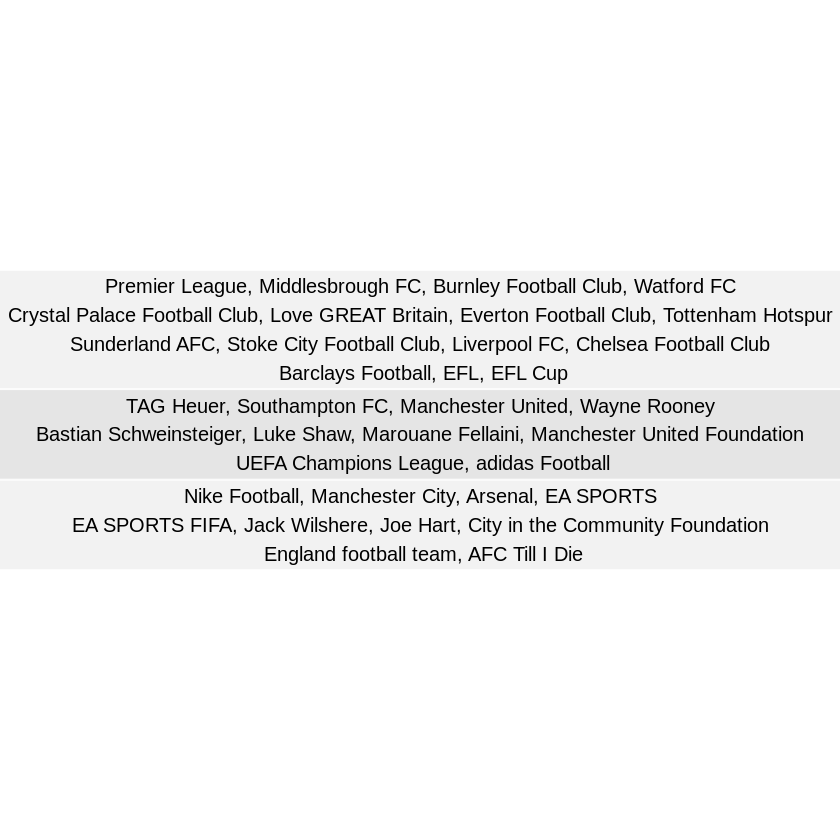

In [39]:
# get page names in each cluster
community_groups <- unlist(lapply(groups(fgc),
                                  function(item) {
                                    pages <- communities$name[item]
                                    i <- 1; 
                                    lim <- 4;
                                    s <- ""
                                    while(i <= length(pages)) {
                                      start = i
                                      end = min((i + lim - 1), length(pages))
                                      s <- paste(s, paste(pages[start:end], collapse = ", "))
                                      s <- paste(s, "\n")
                                      i = i + lim
                                    }
                                    return(substr(s, 1, (nchar(s) - 2)))
                                  }))
grid.table(community_groups)

In [40]:
# get modularity score
modularity(fgc)

[1] 0.2917283

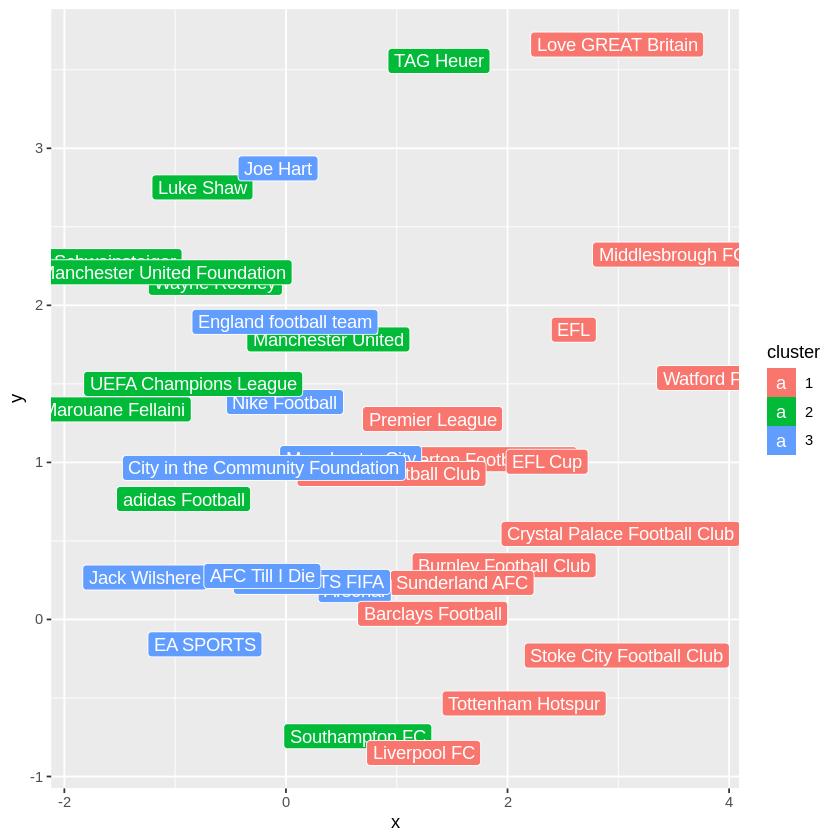

In [41]:
comm_plot <- ggplot(communities, aes(x = x, y = y, color = cluster, label = name))
comm_plot <- comm_plot + geom_label(aes(fill = cluster), colour = "white")
comm_plot

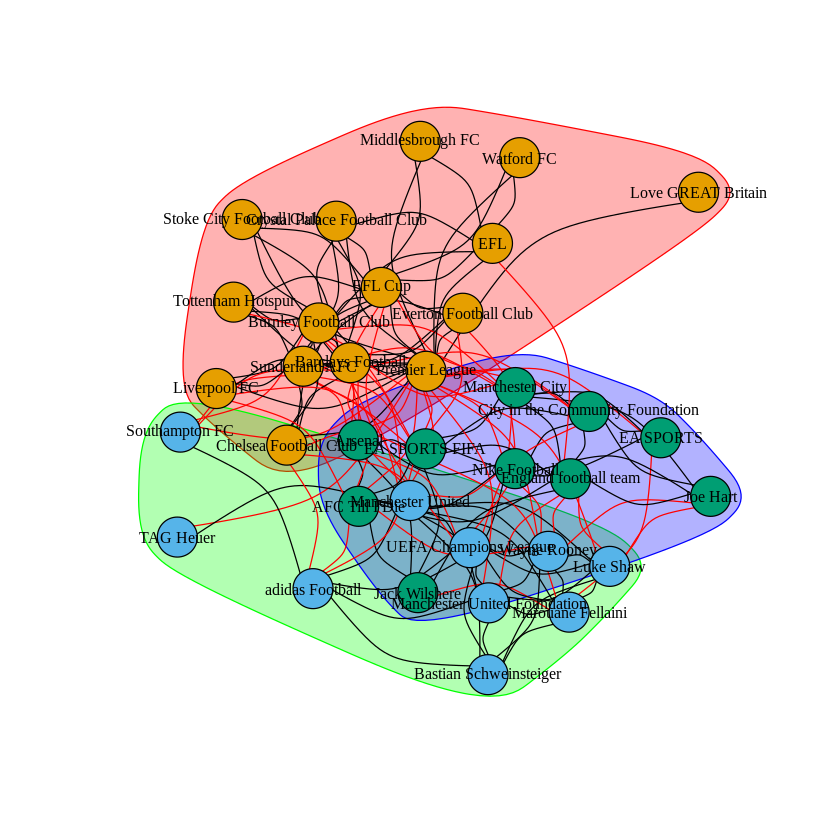

In [42]:
plot(fgc, fplg_undirected,
     vertex.size = 15,
     vertex.label.cex = 0.8,
     vertex.label = fgc$names,
     edge.arrow.size = 0,
     edge.curved = TRUE,
     vertex.label.color = "black",
     layout = layout.fruchterman.reingold)

In [43]:
# edge betweenness clustering
ebc <- cluster_edge_betweenness(fplg_undirected)
layout <- layout_with_fr(fplg_undirected,
                         niter = 500, start.temp = 5.744)
communities <- data.frame(layout)
names(communities) <- c("x", "y")
communities$cluster <- factor(ebc$membership)
communities$name <- V(fplg_undirected)$label
table(communities$cluster)


 1  2  3  4  5  6  7  8  9 10 11 12 
15  1  1  1  1  1  9  1  1  2  1  1 

[1] 0.20595

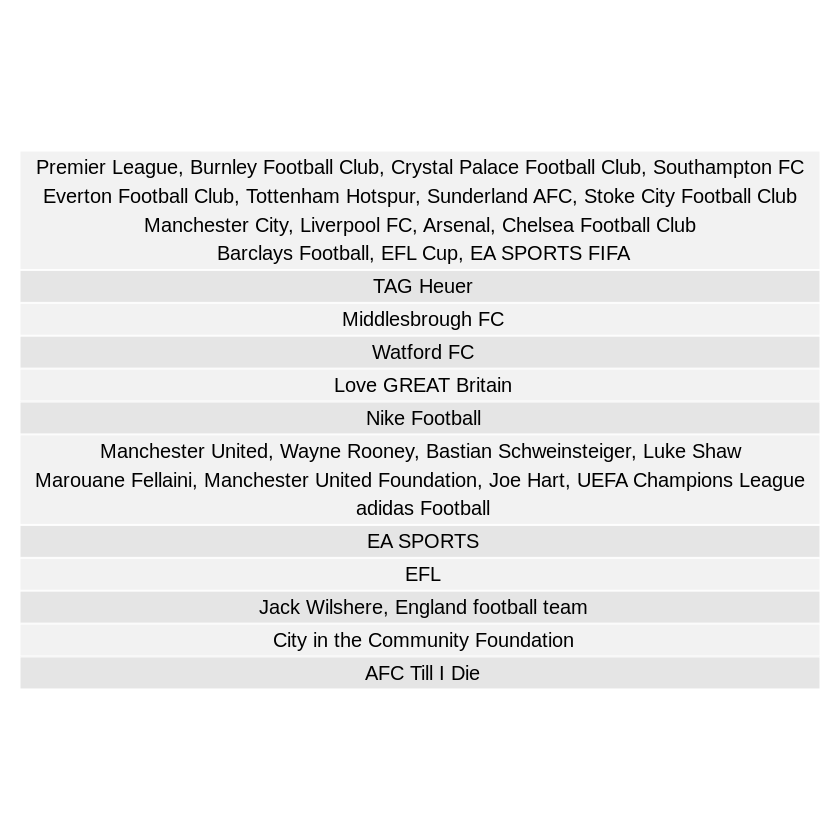

In [44]:
community_groups <- unlist(lapply(groups(ebc),
                                  function(item) {
                                    pages <- communities$name[item]
                                    i <- 1;
                                    lim <- 4;
                                    s <- ""
                                    while(i <= length(pages)) {
                                      start = i
                                      end = min((i + lim - 1), length(pages))
                                      s <- paste(s, paste(pages[start:end], collapse = ", "))
                                      s <- paste(s, "\n")
                                                 i= i + lim
                                    }
                                    return(substr(s, 1, (nchar(s) - 2)))
                                  }))
grid.table(community_groups)
modularity(ebc)

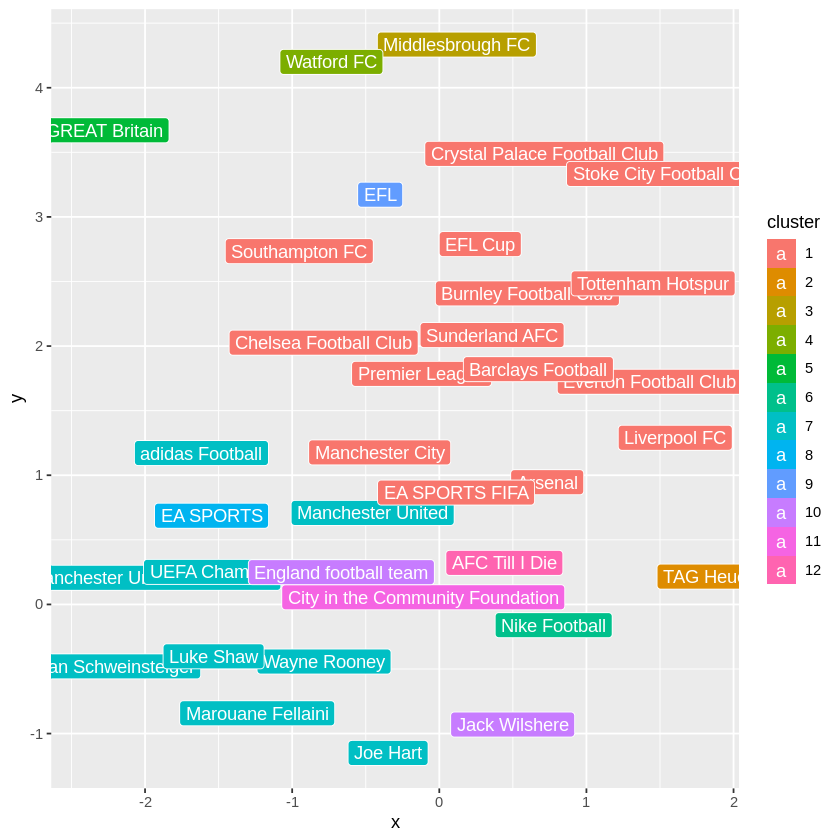

In [45]:
comm_plot <- ggplot(communities, aes(x = x, y = y, color = cluster, label = name))
comm_plot <- comm_plot + geom_label(aes(fill = cluster), colour = "white")
comm_plot

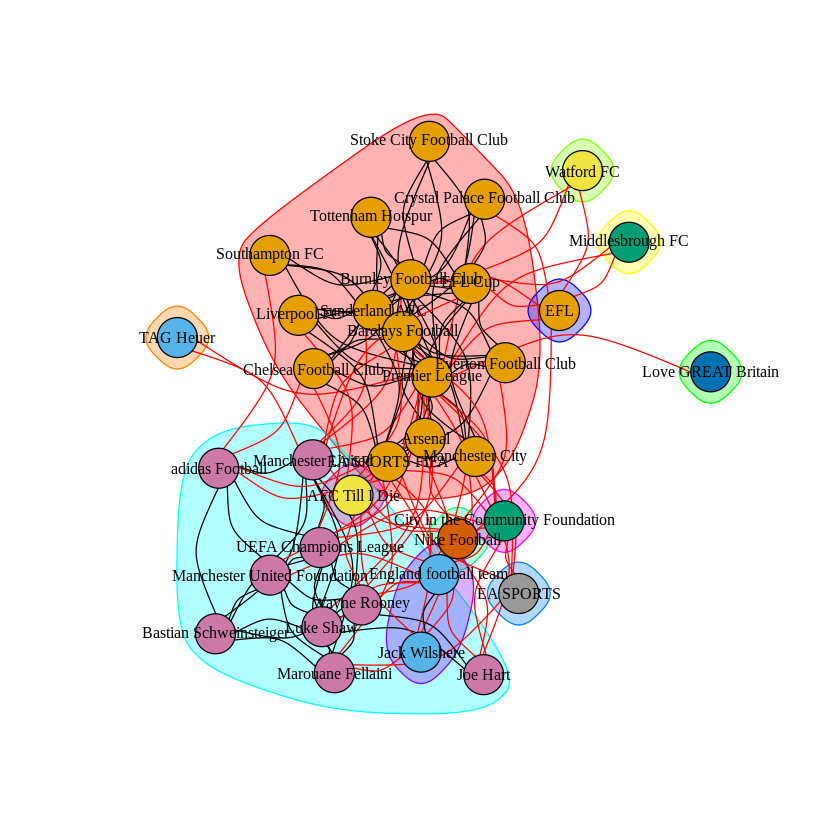

In [46]:
plot(ebc, fplg_undirected,
     vertex.size = 15,
     vertex.label.cex = 0.8,
     vertex.label = ebc$names,
     edge.arrow.size = 0,
     edge.curved = TRUE,
     vertex.label.color = "black",
     layout = layout.fruchterman.reingold)